# PREDICTION ON RISK CATEGORY OF THE APPLICANTS FOR INSURANCE

## Table of Content

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)<br>
3. [Exploratory Data Analysis](#section3)<br>
4. [Model Building](#section4)<br>
    - 4.1 [Preparing X and y using pandas](#section401)<br>
    - 4.2 [Splitting X and y into training and test datasets](#section402)<br>
    - 4.3 [Logistic Regression in scikit-learn](#section403)<br>
    - 4.4 [Model Evaluation for Logistic Regression model](#section404)<br>
    - 4.5 [Random Forest classifier in scikit-learn](#section405)<br>
    - 4.6 [Model Evaluation for Random Forest Classifier model](#section406)<br>
5. [Feature Selection](#section5)<br>
6. [Conclusion](#section6)<br>

## 1. Problem Statement

- To classify the persons application into a risk category of levels 1-8
- Which model fits better provided given insurance data?
- Find out which features are important to assess the risk category?

## 2. Data Loading and Description

![alt text](Insurance.jpg "Title")
- The dataset comproses of __59381 observations of 128 columns__. Below table showing the names of all the columns and their description

| Column Name          | Description                                                                                          |
| -------------------- |:--------------------------------------------------------------------------------------------------- :| 
| ID                   | Unique identifier associated with an application.                                                    | 
| Product_Info_1-7     | Variables relating to the product                                                                    | 
| Ins_Age              | Age of applicant                                                                                     | 
| Ht                   | Height of applicant                                                                                  | 
| Wt                   | Weight of applicant                                                                                  |
| BMI                  | BMI of applicant                                                                                     |
| Employment_Info_1-6  | Variables relating to the employment history of applicant                                            |
| InsuredInfo_1-6      | Variables providing information about the applicant                                                  |
| Insurance_History_1-9| Variables relating to the insurance history of applicant                                             |
| Family_Hist_1-5      | Variables relating to the family history of the applicant                                            |
| Medical_History_1-41 | Variables relating to the medical history                                                            |
| Medical_Keyword_1-48 | Dummy variables relating to the presence of/absence of medicalkeywordassociated with the application |
| Response             | Ordinal variable relating to the final decision associated with an application                       |

#### The following variables are all categorical (nominal):

Product_Info_1, Product_Info_2, Product_Info_3, Product_Info_5, Product_Info_6, Product_Info_7, Employment_Info_2, Employment_Info_3, Employment_Info_5, InsuredInfo_1, InsuredInfo_2, InsuredInfo_3, InsuredInfo_4, InsuredInfo_5, InsuredInfo_6, InsuredInfo_7, Insurance_History_1, Insurance_History_2, Insurance_History_3, Insurance_History_4, Insurance_History_7, Insurance_History_8, Insurance_History_9, Family_Hist_1, Medical_History_2, Medical_History_3, Medical_History_4, Medical_History_5, Medical_History_6, Medical_History_7, Medical_History_8, Medical_History_9, Medical_History_11, Medical_History_12, Medical_History_13, Medical_History_14, Medical_History_16, Medical_History_17, Medical_History_18, Medical_History_19, Medical_History_20, Medical_History_21, Medical_History_22, Medical_History_23, Medical_History_25, Medical_History_26, Medical_History_27, Medical_History_28, Medical_History_29, Medical_History_30, Medical_History_31, Medical_History_33, Medical_History_34, Medical_History_35, Medical_History_36, Medical_History_37, Medical_History_38, Medical_History_39, Medical_History_40, Medical_History_41

__The following variables are discrete:__

Medical_History_1, Medical_History_10, Medical_History_15, Medical_History_24, Medical_History_32

__Medical_Keyword_1-48 are dummy variables.__

__The following variables are continuous:__

Product_Info_4, Ins_Age, Ht, Wt, BMI, Employment_Info_1, Employment_Info_4, Employment_Info_6, Insurance_History_5, Family_Hist_2, Family_Hist_3, Family_Hist_4, Family_Hist_5

The target varaible for this dataset is the __'Response'__ and it is a categorical variable.

### Importing Packages

In [1]:
import pandas as pd                # For data manipulation and analysis
import numpy as np                 # Implemennts milti-dimensional array and matrices
import seaborn as sns              # Provides a high level interface for drawing attractive and informative statistical graphics
import matplotlib.pyplot as plt    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import pandas_profiling

# allow plots to appear directly in the notebook
%matplotlib inline

### Importing the Dataset

In [2]:
# Reading the data
data = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/insurance_data.csv')
data.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,0,8


## 3.Exploratory Data Analysis

This dataset has lot of data handling to be done.
- Checking the data information
- Dealing with Missing values
- Drop 'ID' column as it is not required for the analysis
- Group Categorical data(nominal) and do one hot encoding for multi-class features having class less than 3
- Normalise the multi-class features whose class is more than 3.
- Combine all the continous and categorical data with dummy variables into one dataframe
- Check the Target vaiable(Response) distribution

### Checking the data information

In [3]:
# checking the dataset shape
data.shape

(59381, 128)

The dataset has __59381 rows and 128 columns__

In [4]:
# Checking the datset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Columns: 128 entries, Id to Response
dtypes: float64(18), int64(109), object(1)
memory usage: 58.0+ MB


In [5]:
# checking the dataset description
data.describe()

,Id,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
count,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,...,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000
mean,39507.211515,1.026355,24.415655,0.328952,2.006955,2.673599,1.043583,0.405567,0.707283,0.292587,...,0.056954,0.010054,0.045536,0.010710,0.007528,0.013691,0.008488,0.019905,0.054496,5.636837
std,22815.883089,0.160191,5.072885,0.282562,0.083107,0.739103,0.291949,0.197190,0.074239,0.089037,...,0.231757,0.099764,0.208479,0.102937,0.086436,0.116207,0.091737,0.139676,0.226995,2.456833
min,2.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,19780.000000,1.000000,26.000000,0.076923,2.000000,3.000000,1.000000,0.238806,0.654545,0.225941,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,39487.000000,1.000000,26.000000,0.230769,2.000000,3.000000,1.000000,0.402985,0.709091,0.288703,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
75%,59211.000000,1.000000,26.000000,0.487179,2.000000,3.000000,1.000000,0.567164,0.763636,0.345188,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
max,79146.000000,2.000000,38.000000,1.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000


In [6]:
# checking the columns used in the dataset
data.columns

Index(['Id', 'Product_Info_1', 'Product_Info_2', 'Product_Info_3',
       'Product_Info_4', 'Product_Info_5', 'Product_Info_6', 'Product_Info_7',
       'Ins_Age', 'Ht',
       ...
       'Medical_Keyword_40', 'Medical_Keyword_41', 'Medical_Keyword_42',
       'Medical_Keyword_43', 'Medical_Keyword_44', 'Medical_Keyword_45',
       'Medical_Keyword_46', 'Medical_Keyword_47', 'Medical_Keyword_48',
       'Response'],
      dtype='object', length=128)

### Dealing with Missing values

In [7]:
# Finding the Null values in the data and their total count
data.isnull().sum()[data.isnull().sum() != 0]

Employment_Info_1         19
Employment_Info_4       6779
Employment_Info_6      10854
Insurance_History_5    25396
Family_Hist_2          28656
Family_Hist_3          34241
Family_Hist_4          19184
Family_Hist_5          41811
Medical_History_1       8889
Medical_History_10     58824
Medical_History_15     44596
Medical_History_24     55580
Medical_History_32     58274
dtype: int64

There are many missing values, for the feauture columns having more than 50% missing data i.e  more than 28000 misising values we are gonna drop these columns.

For the features having less than 50 % missing data we are gonna keep the values 
 
 - if the feature is __categoical__, we are gonna replace the value with __Mode()__
 - if the feature is __continous__ , we are gonna replace the value with __Mean()__

In [8]:
# Dropping the feature columns having more than 50 % missing data
cols_drop = data.isnull().sum()[data.isnull().sum() > 28000]
cols_drop.index
data =data.drop(cols_drop.index,axis = 1)

In [9]:
# Replcaing the missing values with Mean for continous variables and Mode for Categorical variables
cont = ['Product_Info_4', 'Ins_Age', 'Ht', 'Wt', 'BMI', 'Employment_Info_1', 'Employment_Info_4', 'Employment_Info_6', 'Insurance_History_5', 'Family_Hist_4']
for col in data:
    if col in cont:
        data[col] = data[col].fillna(data[col].mean())
    else:
        data[col] = data[col].fillna(data[col].mode()[0])

In [10]:
print(data.isnull().sum()[data.isnull().sum() != 0]) # Checking if any missing values after handling
print(data.shape)                                   # checking the shape of the dataset after dealing with missing values

Series([], dtype: int64)
(59381, 121)


### Drop 'ID' column as it is not required for the analysis

In [11]:
data = data.drop(['Id'],axis = 1)

### Group Categorical data(nominal) and do one hot encoding for multi-class features having class less than 3

In [12]:
# Categorial data which has multiclass data of class less than 3
categorical = ['Product_Info_1', 'Product_Info_5', 'Product_Info_6', 'Product_Info_7', 'Employment_Info_3', 'Employment_Info_5', 'InsuredInfo_1', 'InsuredInfo_2',
     'InsuredInfo_4', 'InsuredInfo_5','InsuredInfo_6','InsuredInfo_7','Insurance_History_1','Insurance_History_2','Insurance_History_3', 
     'Insurance_History_4','Insurance_History_7','Insurance_History_8','Insurance_History_9','Family_Hist_1','Medical_History_3',
     'Medical_History_4','Medical_History_5','Medical_History_6','Medical_History_7','Medical_History_8','Medical_History_9','Medical_History_11','Medical_History_12', 
     'Medical_History_13', 'Medical_History_14', 'Medical_History_16', 'Medical_History_17', 'Medical_History_18', 'Medical_History_19', 'Medical_History_20', 'Medical_History_21','Medical_History_22','Medical_History_23',
     'Medical_History_25', 'Medical_History_26', 'Medical_History_27', 'Medical_History_28', 'Medical_History_29', 'Medical_History_30', 'Medical_History_33', 'Medical_History_34', 'Medical_History_35', 'Medical_History_36', 'Medical_History_37', 'Medical_History_38', 'Medical_History_39', 'Medical_History_40']
data_cat = data[categorical] # Creating the dataframe
data_cat.head(2)

,Product_Info_1,Product_Info_5,Product_Info_6,Product_Info_7,Employment_Info_3,Employment_Info_5,InsuredInfo_1,InsuredInfo_2,InsuredInfo_4,InsuredInfo_5,...,Medical_History_29,Medical_History_30,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40
0,1,2,1,1,1,3,1,2,3,1,...,3,2,1,3,1,2,2,1,3,3
1,1,2,3,1,3,2,1,2,3,1,...,3,2,3,1,1,2,2,1,3,3


In [13]:
# Converting the datatype to category for creating dummy variables using one hot encoding
for col in data_cat:
     data_cat[col] = data_cat[col].astype('category')

C:\Users\svnsi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
# Creating the dummy variables using one hot encoding
data_cat = pd.get_dummies(data_cat,drop_first= True)
data_cat.head(2)

,Product_Info_1_2,Product_Info_5_3,Product_Info_6_3,Product_Info_7_2,Product_Info_7_3,Employment_Info_3_3,Employment_Info_5_3,InsuredInfo_1_2,InsuredInfo_1_3,InsuredInfo_2_3,...,Medical_History_35_3,Medical_History_36_2,Medical_History_36_3,Medical_History_37_2,Medical_History_37_3,Medical_History_38_2,Medical_History_39_2,Medical_History_39_3,Medical_History_40_2,Medical_History_40_3
0,0,0,0,0,0,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,1
1,0,0,1,0,0,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,1


### Normalise the multi-class features whose class is more than 3.

The Categorical data having multi-class having more than 3 are :
   - Medical_History_1  :  171
   - Medical_History_2  :  579 
   - Product_Info_2     :  19
   - Product_Info_3     :  34
   - Employment_Info_2  :  36
   - InsuredInfo_3      :  11
        
Creating Dummy variables for such high classes will result in many columns and it will be difficut for the analysis and for the perfect fit for the model. Hence we are gonna standardize the individual columns using Z-score standardization
![alt text](Z-score.jpg "Title")

In [15]:
# Z-score = (Value(x)- Mean)/ Standard Deviation
# Finding Mean and Standard Deviation for features
std_MH_1= np.std(data['Medical_History_1']) # Finding the Standard deviation for Medical_History_1
mean_MH_1 = np.mean(data['Medical_History_1']) # Finding the mean for Medical_History_1
std_MH_2= np.std(data['Product_Info_3']) # Finding the Standard deviation for Product_Info_3
mean_MH_2 = np.mean(data['Product_Info_3']) # Finding the mean for Product_Info_3
std_MH_3= np.std(data['Employment_Info_2']) # Finding the Standard deviation for Employment_Info_2
mean_MH_3 = np.mean(data['Employment_Info_2']) # Finding the mean for Employment_Info_2
std_MH_4= np.std(data['InsuredInfo_3']) # Finding the Standard deviation for InsuredInfo_3
mean_MH_4 = np.mean(data['InsuredInfo_3']) # Finding the mean for InsuredInfo_3
std_MH_5= np.std(data['Medical_History_2']) # Finding the Standard deviation for Medical_History_2
mean_MH_5 = np.mean(data['Medical_History_2']) # Finding the mean for Medical_History_2
data['Medical_History_1'] = data['Medical_History_1'].apply(lambda x: (x-mean_MH_1)/std_MH_1) # applying the Z -score for Medical_History_1 
data['Product_Info_3'] = data['Product_Info_3'].apply(lambda x: (x-mean_MH_2)/std_MH_2) # applying the Z -score for Product_Info_3
data['Employment_Info_2'] = data['Employment_Info_2'].apply(lambda x: (x-mean_MH_3)/std_MH_3) # applying the Z -score for Employment_Info_2
data['InsuredInfo_3'] = data['InsuredInfo_3'].apply(lambda x: (x-mean_MH_4)/std_MH_4) # applying the Z -score for InsuredInfo_3
data['Medical_History_2'] = data['Medical_History_2'].apply(lambda x: (x-mean_MH_5)/std_MH_5) # applying the Z -score for Medical_History_2

For __Product_Info_2__ the feature data is in Category and it is not scaled or labelled. Hence we will Label the data using LabelEncoder and then Standardize using Z-score

In [16]:
# Label encoding for the feature Product_Info_2 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Product_Info_2']= le.fit_transform(data['Product_Info_2'])        # Transforming the feature to Labels

In [17]:
std_MH_6= np.std(data['Product_Info_2'])                            # Finding the mean for Product_Info_2
mean_MH_6 = np.mean(data['Product_Info_2'])                         # Finding the Standard deviation for Product_Info_3
data['Product_Info_2'] = data['Product_Info_2'].apply(lambda x: (x-mean_MH_6)/std_MH_6) # applying z-score standardization for Product_Info_2

In [18]:
std = ['Medical_History_1','Product_Info_3','Employment_Info_2','InsuredInfo_3','Medical_History_2','Product_Info_2'] # List of the nstandardized columns
data_std = data[std]         # Creating dataset for features for which standardization is been done
print(data_std.head(2))

   Medical_History_1  Product_Info_3  Employment_Info_2  InsuredInfo_3  \
0          -0.238033       -2.841731            0.79445       0.061379   
1          -0.156514        0.312319           -1.80784       0.061379   

   Medical_History_2  Product_Info_2  
0          -0.794913        0.645257  
1           0.884633       -2.309031  


We already have dummy variables for Medical_Keyword_1-48. We will create a Dataframe for these and later will be added to categorical and continous data

In [19]:
dummies = ['Medical_Keyword_1', 'Medical_Keyword_2', 'Medical_Keyword_3', 'Medical_Keyword_4', 'Medical_Keyword_5', 'Medical_Keyword_6', 'Medical_Keyword_7', 'Medical_Keyword_8',
 'Medical_Keyword_9', 'Medical_Keyword_10', 'Medical_Keyword_11', 'Medical_Keyword_12', 'Medical_Keyword_13', 'Medical_Keyword_14', 'Medical_Keyword_15', 'Medical_Keyword_16',
 'Medical_Keyword_17', 'Medical_Keyword_18', 'Medical_Keyword_19', 'Medical_Keyword_20', 'Medical_Keyword_21', 'Medical_Keyword_22', 'Medical_Keyword_23', 'Medical_Keyword_24',
 'Medical_Keyword_25', 'Medical_Keyword_26', 'Medical_Keyword_27', 'Medical_Keyword_28', 'Medical_Keyword_29', 'Medical_Keyword_30', 'Medical_Keyword_31', 'Medical_Keyword_32',
 'Medical_Keyword_33', 'Medical_Keyword_34', 'Medical_Keyword_35', 'Medical_Keyword_36', 'Medical_Keyword_37', 'Medical_Keyword_38', 'Medical_Keyword_39', 'Medical_Keyword_40',
 'Medical_Keyword_41', 'Medical_Keyword_42', 'Medical_Keyword_43', 'Medical_Keyword_44', 'Medical_Keyword_45', 'Medical_Keyword_46', 'Medical_Keyword_47', 'Medical_Keyword_48']
data_dummies = data[dummies]        # Creating a data frame for dummy variables
data_dummies.head(2)

,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,...,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Creating a __Dataframe__ for __continous data__

In [20]:
continous = ['Medical_History_1','Product_Info_4', 'Ins_Age', 'Ht', 'Wt', 'BMI', 'Employment_Info_1', 'Employment_Info_4', 'Employment_Info_6', 'Insurance_History_5', 
             'Family_Hist_4','Response']
data_cont = data[continous]          # Creating a data frame for continous data
data_cont.head(2)

,Medical_History_1,Product_Info_4,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_4,Employment_Info_6,Insurance_History_5,Family_Hist_4,Response
0,-0.238033,0.076923,0.641791,0.581818,0.148536,0.323008,0.028,0.0,0.361469,0.000667,0.444890,8
1,-0.156514,0.076923,0.059701,0.600000,0.131799,0.272288,0.000,0.0,0.001800,0.000133,0.084507,4


### Combine all the continous and categorical data with dummy variables into one dataframe

In [21]:
new_data = pd.concat([data_cat,data_cont,data_dummies,data_std],axis = 1)    # Combining all the data i.e categorical, continous, dummy , standardized into one 
new_data.head(2)

,Product_Info_1_2,Product_Info_5_3,Product_Info_6_3,Product_Info_7_2,Product_Info_7_3,Employment_Info_3_3,Employment_Info_5_3,InsuredInfo_1_2,InsuredInfo_1_3,InsuredInfo_2_3,...,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Medical_History_1,Product_Info_3,Employment_Info_2,InsuredInfo_3,Medical_History_2,Product_Info_2
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,-0.238033,-2.841731,0.79445,0.061379,-0.794913,0.645257
1,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,-0.156514,0.312319,-1.80784,0.061379,0.884633,-2.309031


In [22]:
new_data.shape    # checking the shape of the final dataset after dealing with the all the data preparation

(59381, 157)

### Check if the Target vaiable(Response) is distributed normally

The Target variable is __Response__ and of ordinal type [1,2,3,4,5,6,7,8] . We need to check if the data is biased or not.
For example : if 90% of data consists of only value '8' and remaining 10 % for other values then the predicted value of the true data will be mostly '8'. This causes the situation of bad classifier

In [23]:
# counting the individual counts in the data
new_data['Response'].value_counts()

8    19489
6    11233
7     8027
2     6552
1     6207
5     5432
4     1428
3     1013
Name: Response, dtype: int64

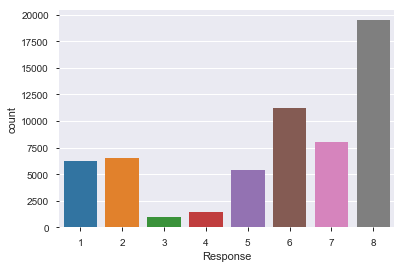

In [24]:
# plotting the value counts using countplot for better visualiation
sns.countplot(x = 'Response', data = new_data)

From the above graph , we can see that the level 8 has more values than any other levels and this might cause the data bias and it might result in overfitting the model . If the model is overfit in the upcoming steps then we will have to sample the data of level 8.

In [25]:
# # Resampling the data of level 6 and level 8 
# insurance_data = []
# count_8 = 0
# count_6 = 0
# for i in range(len(new_data['Response'])):
#     if data.iloc[i,-1] == 8:
#         if count_8 <8000:
#             count_8 += 1
#             new_data.append(new_data.iloc[i,:])
#     elif data.iloc[i,-1] == 6:
#         if count_6 <8000:
#             count_6 += 1
#             new_data.append(new_data.iloc[i,:])
#     else:
#             new_data.append(new_data.iloc[i,:])

## 4. Model Building

### 4.1 Preparing X and y using pandas

In [26]:
# X as the feature columns and y as the target variable
X = new_data.loc[:,data.columns != 'Response']
y = new_data['Response']

### 4.2 Splitting X and y into training and test datasets

In [27]:
# To avid the true error we will do Cross-validation by using the data and splitting into 80% train and 20% test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20, random_state = 1)
print(X_train.shape)
print(y_train.shape)

(47504, 119)
(47504,)


### 4.3 Logistic Regression in scikit-learn

In [28]:
from sklearn.linear_model import LogisticRegression   # import the Logistic regression model which we will be using
logreg = LogisticRegression()
logreg.fit(X_train,y_train)  #Train the model on the training data

C:\Users\svnsi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\svnsi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

#### Using the Model for Prediction

In [29]:
y_pred_test = logreg.predict(X_test) # Use the Logistic regression prediction method on the test data
y_pred_train = logreg.predict(X_train) # Use the Logistic regression prediction method on the train data

### 4.4 Model Evaluation for Logistic Regression model

#### Using Accuracy score

In [30]:
from sklearn.metrics import accuracy_score # importing accuracy score to evaluate the model
score = accuracy_score(y_test,y_pred_test)
score1 = accuracy_score(y_train,y_pred_train)
print('The accuracy_score of the train is:',score1)
print('The accuracy_score of the test is:',score)

The accuracy_score of the train is: 0.786481138430448
The accuracy_score of the test is: 0.7787320030310685


#### Using Confusion Matrix

In [31]:
from sklearn.metrics import confusion_matrix # importing confusion matrix to evaluate the model
confusion_matrix2 = pd.DataFrame(confusion_matrix(y_test,y_pred_test))
confusion_matrix2.index = ['Actual_1','Actual_2','Actual_3','Actual_4','Actual_5','Actual_6','Actual_7','Actual_8']
confusion_matrix2.columns = ['Predicted_1','Predicted_2','Predicted_3','Predicted_4','Predicted_5','Predicted_6','Predicted_7','Predicted_8']
confusion_matrix2

,Predicted_1,Predicted_2,Predicted_3,Predicted_4,Predicted_5,Predicted_6,Predicted_7,Predicted_8
Actual_1,1280,0,0,0,0,0,0,0
Actual_2,0,1190,2,38,48,48,0,0
Actual_3,0,46,9,42,10,87,0,0
Actual_4,0,21,4,96,7,154,1,0
Actual_5,0,7,0,12,373,594,136,0
Actual_6,0,0,0,34,185,1643,344,0
Actual_7,0,0,0,6,53,737,800,12
Actual_8,0,0,0,0,0,0,0,3858


From the above confusion matrix, the __correct predictions__ are 9249 and __false predictions__ are 2628

### 4.5 Random Forest classifier in scikit-learn

In [32]:
from sklearn.ensemble import RandomForestClassifier # import the ensemble model Random forest 
model2 = RandomForestClassifier(n_estimators= 150, random_state = 0)
model2.fit(X_train,y_train) # Instante and fit the model to the training data with 150 estimators

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

#### Using the Model for Prediction

In [33]:
# making predictions on both test and train data
y_pred_test1 = model2.predict(X_test) 
y_pred_train1 = model2.predict(X_train)

### 4.6 Model Evaluation for Random Forest Classifier model

For Random Forest classifier model, the loss functions are Entropy and Gini. And this case we are using GINI index .
And for evaluation metrics we will use __accuracy score and confusion matrix__.

#### Using Accuracy score

In [34]:
from sklearn.metrics import accuracy_score # importing accuracy_score from metrics
score3 = accuracy_score(y_test,y_pred_test1)
score4 = accuracy_score(y_train,y_pred_train1)
print('The accuracy_score of the test is:',score3)
print('The accuracy_score of the train is:',score4)

The accuracy_score of the test is: 0.9532710280373832
The accuracy_score of the train is: 1.0


#### Using Confusion Matrix

Confusion matrix is a number of correct and incorrect predictions are summaried with count values and broken down by each class

In [35]:
from sklearn.metrics import confusion_matrix
confusion_matrix1 = pd.DataFrame(confusion_matrix(y_test,y_pred_test1))
confusion_matrix1.index = ['Actual_1','Actual_2','Actual_3','Actual_4','Actual_5','Actual_6','Actual_7','Actual_8']
confusion_matrix1.columns = ['Predicted_1','Predicted_2','Predicted_3','Predicted_4','Predicted_5','Predicted_6','Predicted_7','Predicted_8']
confusion_matrix1

,Predicted_1,Predicted_2,Predicted_3,Predicted_4,Predicted_5,Predicted_6,Predicted_7,Predicted_8
Actual_1,1243,24,1,3,1,8,0,0
Actual_2,22,1254,2,17,8,23,0,0
Actual_3,5,93,53,22,10,11,0,0
Actual_4,10,48,2,177,9,37,0,0
Actual_5,5,79,1,18,940,78,1,0
Actual_6,0,3,0,0,1,2202,0,0
Actual_7,0,0,0,0,0,13,1595,0
Actual_8,0,0,0,0,0,0,0,3858


From the above confusion matrix, the __correct predictions__ are 11322 and __false predictions__ are 555

From the accuracy score and from the count of correct predictions we will consider the __Random Forest classifier__ for our model for predicting the risk level for the applications

### 5.  Feature Selection

Finding which features will help in classifying the risk level of the incoming applications for insurance. This assessment will be helpful in increasing the model prediction rate more by not considering the least importance features. In this model we are using Random forest classifier for this task.

In [36]:
feat_importance = model2.feature_importances_ # List of data of important featured
features = data.loc[:,data.columns != 'Response'].columns

In [37]:
# Zipping the features and corresponding feature importance values together
myList = []
for c1,c2 in zip(features,feat_importance):
    myList.append([c1,c2])   

In [38]:
# Creating a new data frame and naming the columns
new_data = pd.DataFrame(myList)
new_data.columns = ['features','feat_importance']

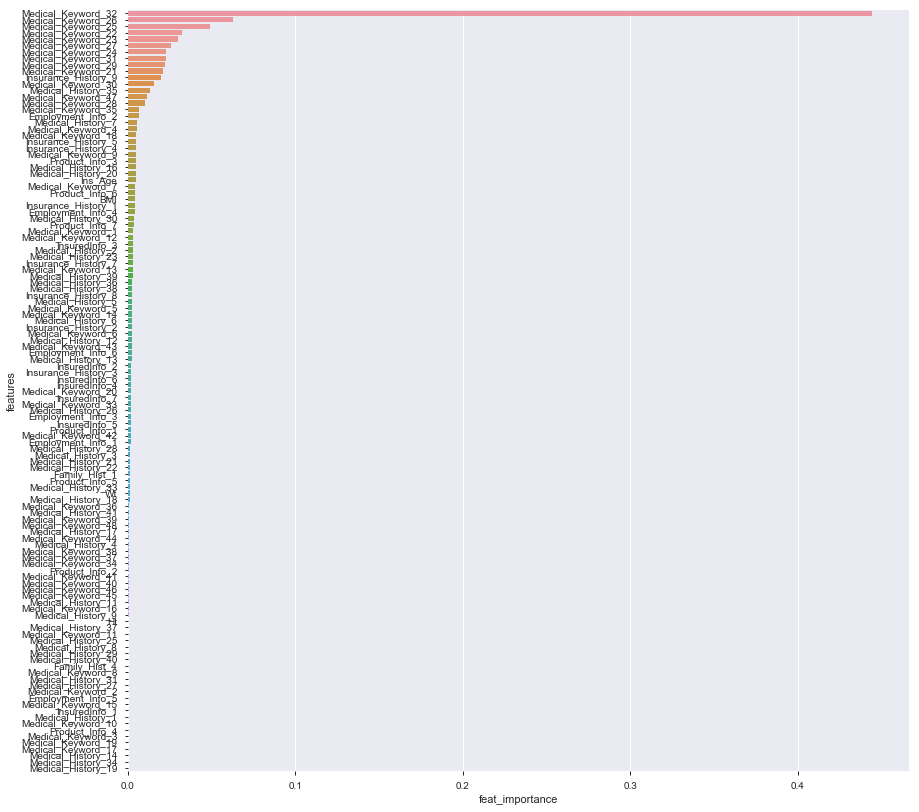

In [39]:
# plotting the graph of the features with high importance for better visualization 
f,ax = plt.subplots(figsize = (14,14))
sns.barplot(x= 'feat_importance',y = 'features', data = new_data.sort_values(by = ['feat_importance'],ascending= False))

In [40]:
# Top 30 features which are important
new_data.sort_values(by = ['feat_importance'],ascending= False).head(30)  # Top 30 Features which are important for the model prediction

,features,feat_importance
102,Medical_Keyword_32,0.444265
96,Medical_Keyword_26,0.062944
95,Medical_Keyword_25,0.048776
92,Medical_Keyword_22,0.032212
93,Medical_Keyword_23,0.030128
97,Medical_Keyword_27,0.025913
94,Medical_Keyword_24,0.022742
101,Medical_Keyword_31,0.022682
99,Medical_Keyword_29,0.022254
91,Medical_Keyword_21,0.021201


### 6. Conclusion 

- The data has been handled by splitting them into categorical, discrete and continous data and dealing with missing values
- Observed the data can be biased as the values of class 8 are more but as the models prediction is good , we are not gonna sample the data
- Used different classification algorithms like Logistic Regression and Random forest classification on this dataset
- From the accuracy score(95%) and correct predictions we will use the Random forest classifier as best fit model for this classification problem
- Found the important features for building the model and keep them for future reference